# ZMS Lab3  Pitu Case - Julia

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kiedy-ruina-=-RUINA-?" data-toc-modified-id="Kiedy-ruina-=-RUINA-?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kiedy ruina = RUINA ?</a></span></li><li><span><a href="#Weryfikacja-hipotez-i-wyznaczanie-parametrów" data-toc-modified-id="Weryfikacja-hipotez-i-wyznaczanie-parametrów-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Weryfikacja hipotez i wyznaczanie parametrów</a></span></li><li><span><a href="#Wielkość-szkód" data-toc-modified-id="Wielkość-szkód-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Wielkość szkód</a></span></li><li><span><a href="#Model-symulacji" data-toc-modified-id="Model-symulacji-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model symulacji</a></span></li><li><span><a href="#Symulacja" data-toc-modified-id="Symulacja-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Symulacja</a></span></li><li><span><a href="#Raport" data-toc-modified-id="Raport-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Raport</a></span><ul class="toc-item"><li><span><a href="#Zbadaj-płynność-firmy-w-zależności-od-parametrów" data-toc-modified-id="Zbadaj-płynność-firmy-w-zależności-od-parametrów-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Zbadaj płynność firmy w zależności od parametrów</a></span></li></ul></li></ul></div>

## Kiedy ruina = RUINA ?

*opr. P. Wojewnik na podstawie:*

*„Optymalizacja portfela szkód” K. Saduś, M. Kwiecień, R. Lipiński* oraz *„Ubezpieczenia komunikacyjne firmy ABC” A. Kołota, M. Mączyńska*


Prezes zarządu zakładu ubezpieczeń PiTU S.A., Marcin R., zasłyszał, że Prezydent planuje naturalizować wszystkich chętnych z Dżydżykistanu. *No to teraz się zacznie*, pomyślał, *Dżydżykowie jeżdżą jak wariaci, wzrośnie szkodowość, a więc musimy podnieść dla nich ceny.* 

Marcin R. dzwoni do aktuariuszki – Aldony P., ale tu czeka go niespodzianka. *Mój synek zachorował... Grypa to nic wielkiego... Ale w świńskim wydaniu bywa niebezpieczna.* Marcin z bólem serca odsyła Aldonę do domu, a zlecenie dostaje Marek T., asystent Aldony. Pytanie brzmi: **czy składka 500 zł jest wystarczająca ?**

Dotychczasowe doświadczenia PiTU S.A. z Dżydżykami są następujące:

<table>
<tr></tr>
<tr><td>

| Liczba szkód    | Liczba polis
|-----------------|-------------
| 0               | 3 437
| 1               | 522
| 2               | 40
| 3               | 2
| 4               | 0
| 5               | 0

</td><td>

| Wielkość szkody | Liczba szkód
|-----------------|-------------
| -               | 0
| 100             | 0
| 200             | 2
| 500             | 27
| 1 000           | 52
| 2 000           | 115
| 5 000           | 203
| 10 000          | 106
| 20 000          | 42
| 40 000          | 14
| 50 000          | 0
| 55 000          | 0
| 60 000          | 1

</td></tr> </table>

Aldona rzuciła jeszcze przez telefon, że **liczbę szkód dobrze opisuje rozkład Poissona**, natomiast **wielkość szkód – rozkład log-normalny**. Z Marcina udało się wydusić **oczekiwaną liczbę klientów – 100** – oraz **aktualną nadwyżkę 10 000**.


**Pytania:**
1.	Jaką ustalić składkę OC, aby ruina kierowców nie była udziałem PiTU S.A.?
2.	Czy nadwyżka końcowa będzie równa początkowej?
3.	Jakie jest zagrożenie ruiną?
4.	Jaka powinna być nadwyżka i składka, żeby prawdopodobieństwo ruiny było mniejsze niż 0,01?


## Weryfikacja hipotez i wyznaczanie parametrów

In [1]:
using Plots
using Distributions
using CSV
using HypothesisTests
using Random

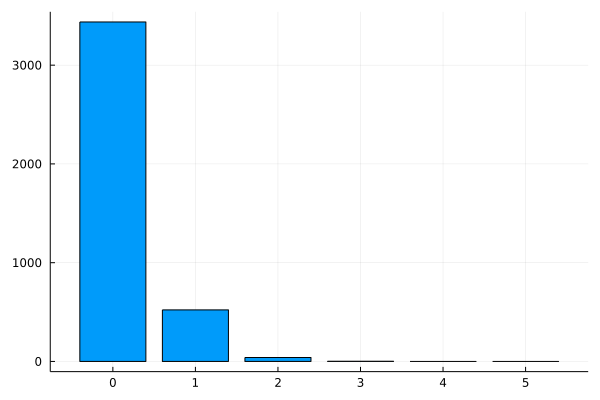

In [2]:
liczba_szkod = Dict(0 => 3437,
                1 => 522,
                2 => 40,
                3 => 2,
                4 => 0, 
                5 => 0)

bar(liczba_szkod, legend=false)

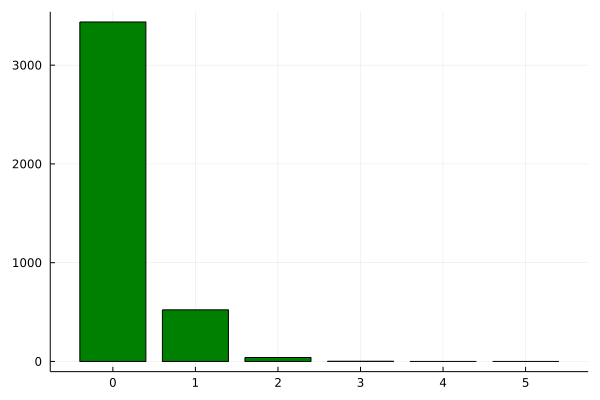

In [3]:
# Średnia liczba szkód:
liczba_polis = sum(values(liczba_szkod))
srednia_liczba_szkod = (sum([x * y for (x, y) in liczba_szkod]) / 
                        liczba_polis)

# Czy liczba szkód ma faktycznie rozkład Poissona?
poiss = Poisson(srednia_liczba_szkod)
k = length(liczba_szkod)-1
poisson_test = pdf.(poiss, 0:k) * liczba_polis

bar(0:k, poisson_test, fillcolor = :green, legend = false)

Funkcja rozkładu prawdopodobieństwa w rozkładzie Poissona ze średnią $\lambda$
$$f(k,\lambda)=\frac{\lambda^ke^{-\lambda}}{k!}$$

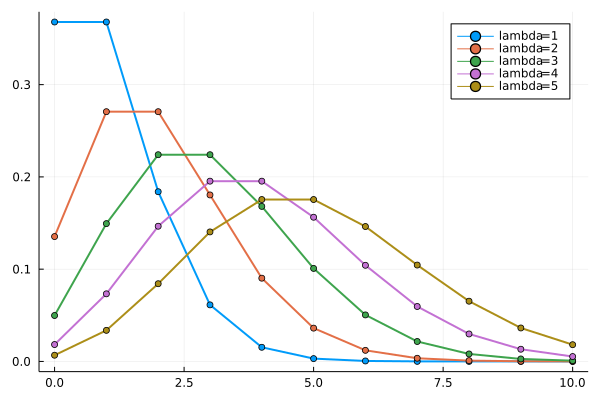

In [4]:
# Rozkład Poissona
p = [ λ^k*exp(-λ)/factorial(k) for k in 0:10, λ in 1:5]
plot(0:10, p, markershape = :circle, lw = 2, labels = reshape([raw"\lambda="*string(i) for i in 1:5],1,:))

In [5]:
# Test chi-kwadrat z biblioteki HypothesisTests pomoże odpowiedziec na pytanie
chtest = ChisqTest([liczba_szkod[i] for i in 0:k],poisson_test/sum(poisson_test));
pval = pvalue(chtest)
println("p-value=",pval)
if pval > 0.05
    print("Brak podstaw do odrzucenia hipotezy zerowej")
else
    print("Należy odrzucić hipotezę zerową")
end

p-value=0.9999022759058723
Brak podstaw do odrzucenia hipotezy zerowej

## Wielkość szkód

In [19]:
szkody = CSV.read("/home/vlad/SGH/data/data_asm/szkody.txt", header=false, DataFrame)[:,2];

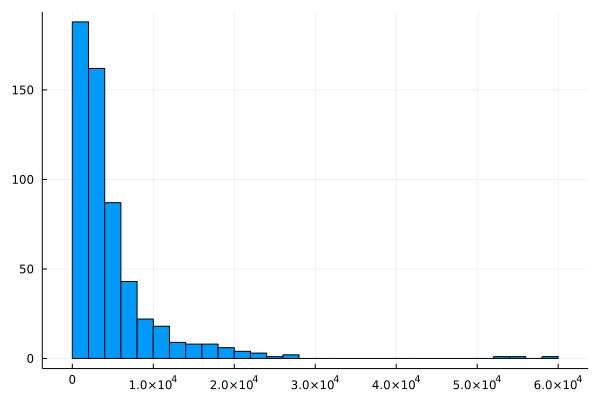

In [20]:
histogram(szkody, legend = false, bins = 50)

In [21]:
println("Średnia wielkość szkod: ", round(mean(szkody)))

Średnia wielkość szkod: 4742.0


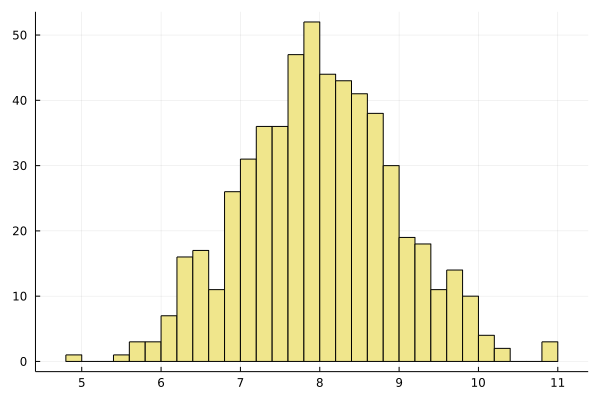

In [22]:
# Wielkość szkód ma rozkład log-normalny:
szkody_ln = log.(szkody);
histogram(szkody_ln, fillcolor=:khaki, legend = false, bins = 50)

In [23]:
# ... czy faktycznie? test Kolmogorova-Smirnova
kstest = ExactOneSampleKSTest(szkody_ln, Normal(mean(szkody_ln), std(szkody_ln)))
kspval = pvalue(kstest)
if kspval > 0.05
    println("p-value wyniosło:", kspval, 
           "\nBrak więc podstaw do odrzucenia hipotezy " *
           "o log-normalności rozkładu zmiennej")
else
    println("należy odrzucic hipotezę zerowa")
end

p-value wyniosło:0.9970804174500004
Brak więc podstaw do odrzucenia hipotezy o log-normalności rozkładu zmiennej


┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /home/vlad/.julia/packages/HypothesisTests/V7PST/src/kolmogorov_smirnov.jl:68


In [25]:
# Parametry wielkości szkód potrzebne do symulacji:
SR_SZKODA_LN = mean(szkody_ln)
STD_SZKODA_LN = std(szkody_ln);

## Model symulacji

In [26]:
function model(liczba_klientow::Int, 
                srednia_liczba_szkod::Number, 
                sr_szkoda_ln::Number, 
                std_szkoda_ln::Number, 
                horyzont::Int, 
                nadwyzka::Number, 
                skladka::Number, 
                seed::Int=-1)

    # Common Random Numbers aby móc porównać różne scenariusze:
    seed == -1 || Random.seed!(seed) 

    # Definiujemy daty umów klientów w symulacji:
    daty_umow = [rand(1:365) for i in 1:liczba_klientow]
    kalendarz_wplat = zeros(Int,365)
    for dataUmowy in daty_umow
        kalendarz_wplat[dataUmowy] += 1
    end
    # Liczymy liczbę szkód przypadających na jednego klienta:
    liczba_szkod_klienta = rand(Poisson(srednia_liczba_szkod),liczba_klientow)
    
    # Ustalamy daty wypłaty dla wszystkich polis:
    kalendarz_wyplat = zeros(Int,365*horyzont) 
    for k in 1:liczba_klientow
        for s in 1:liczba_szkod_klienta[k]
            data_wyplaty = daty_umow[k] + rand(1:365)
            kalendarz_wyplat[data_wyplaty] += 1
        end
    end
    
    
    # Analiza wyników firmy dla danego horyzontu czasowego i danych szkód:
    for dzien in 1:365*horyzont
        if dzien <= 364
            nadwyzka += kalendarz_wplat[dzien] * skladka
        end
        liczba_wyplat = kalendarz_wyplat[dzien]
        odszkodowania = 0 
        if liczba_wyplat > 0
            wartosci_wyplat = rand(Normal(sr_szkoda_ln,std_szkoda_ln),liczba_wyplat)
            odszkodowania = sum(exp.(wartosci_wyplat))
        end
        if nadwyzka < odszkodowania
            return nadwyzka - odszkodowania
        end
        nadwyzka -= odszkodowania
    end
    return nadwyzka
end

model (generic function with 2 methods)

In [27]:
function wywolanie(nadwyzka::Number, skladka::Number, liczba_powtorzen::Int, 
              liczba_klientow::Int, srednia_liczba_szkod::Number, 
              sr_szkoda_ln::Number, std_szkoda_ln::Number, horyzont::Int)
    wynik = []
    bankructwo = 0
    wynik_dodatni = []
    for seed in 1:liczba_powtorzen
        push!(wynik, model(liczba_klientow, srednia_liczba_szkod , 
                           sr_szkoda_ln, std_szkoda_ln, horyzont, 
                           nadwyzka, skladka, seed))
        if wynik[seed] < 0
            bankructwo += 1
        end 
        if wynik[seed] > 0
            push!(wynik_dodatni, wynik[seed])
        end
    end
    sredni_wynik = mean(wynik_dodatni)
    prawd_bankr = bankructwo / liczba_powtorzen
    return bankructwo, prawd_bankr, sredni_wynik
end   

wywolanie (generic function with 1 method)

## Symulacja

Nadwyzka: 10000 Skladka: 500 Liczba ruin: 64 Średni wynik: 17329.0 Prawd_bankr: 0.64
Nadwyzka: 10000 Skladka: 600 Liczba ruin: 47 Średni wynik: 20275.0 Prawd_bankr: 0.47
Nadwyzka: 10000 Skladka: 700 Liczba ruin: 32 Średni wynik: 24611.0 Prawd_bankr: 0.32
Nadwyzka: 10000 Skladka: 800 Liczba ruin: 25 Średni wynik: 31896.0 Prawd_bankr: 0.25
Nadwyzka: 10000 Skladka: 900 Liczba ruin: 21 Średni wynik: 39935.0 Prawd_bankr: 0.21
Nadwyzka: 10000 Skladka: 1000 Liczba ruin: 11 Średni wynik: 44745.0 Prawd_bankr: 0.11


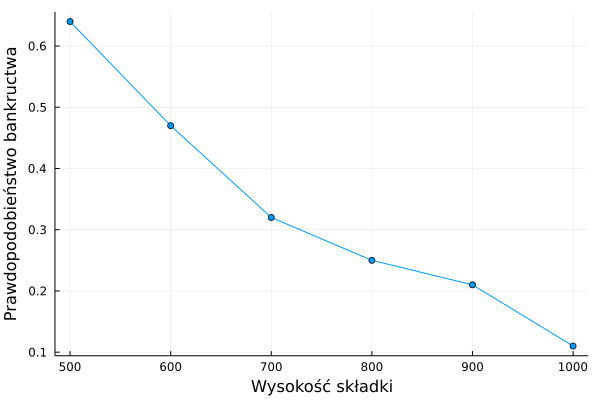

In [28]:
# zmienne i parametry w modelu:
sr_wynik = [] # Średni wynik finansowy firmy
wysokosc_skladki = []
prawd_bankr = []
liczba_ruin = [] 

LICZBA_POWTORZEN = 100
LICZBA_KLIENTOW = 100
HORYZONT = 2 # Długość obowiązywania umowy - zakładamy 2 lata


for nadwyzka in 10000:10000:10000
    for skladka in 500:100:1000
        wartosc_f_xy = wywolanie(nadwyzka, skladka, 
                                 LICZBA_POWTORZEN, LICZBA_KLIENTOW, 
                                 srednia_liczba_szkod , SR_SZKODA_LN, 
                                 STD_SZKODA_LN, HORYZONT)
        push!(wysokosc_skladki,skladka)
        push!(liczba_ruin,wartosc_f_xy[1])
        push!(prawd_bankr,wartosc_f_xy[2])
        push!(sr_wynik,wartosc_f_xy[3])
        println("Nadwyzka: ", nadwyzka, " Skladka: ", skladka, 
              " Liczba ruin: ", wartosc_f_xy[1], " Średni wynik: ",
              round(wartosc_f_xy[3]), " Prawd_bankr: ", wartosc_f_xy[2])
    end
end
ENV["GKS_ENCODING"] = "utf-8"      
plot(wysokosc_skladki, prawd_bankr, markershape=:circle,
ylabel = "Prawdopodobieństwo bankructwa",
xlabel = "Wysokość składki",
legend = false)

## Raport

### Zbadaj płynność firmy w zależności od parametrów

---
Pliki:
* **Wersja Jupyter** : 
    1. Notebook w formacie `.ipynb` 
    2. Plik `.html/.pdf` wygenerowany z notebooka
* **Wersja Word**: 
     1. Skrypt z kodem w formacie `.jl` lub `.ipynb`, 
     2. Plik Worda w formacie`.docx`, 
     3. Inne pliki użyte w trakcie pracy np. `.xlsx`, 
     4. Plik `.pdf` wygnerowany z pliku Word

Pliki raportu proszę spakować do pliku `.zip` o nazwie __ZMS202021S_nazwisko1_nazwisko2_nazwisko3_nazwisko4.zip__ i wgrać na Moodle

Imiona i nazwiska oraz numery indeksu proszę podać również na stronie tytułowej raportu

Struktura raportu: http://moodle.szufel.pl/mod/page/view.php?id=61
(sekcja **Zawartość raportu**)

---
**Pytania**
1. Jaką ustalić składkę OC, aby prawdopodobieństwo ruiny było mniejsze niż 0,01? (analiza 1 parametru)
2. Jaka powinna być nadwyżka i składka, żeby prawdopodobieństwo ruiny było mniejsze niż 0,01? (analiza 2 parametrów)
3. Kiedy nadwyżka końcowa będzie równa początkowej? Oszacuj na podstawie modelu regresji.
4. Jak liczba symulacji wpływa na wyniki?

---